# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [64]:
# place your code into this Code cell
df = pd.read_csv('./data/New_York_City_Leading_Causes_of_Death.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

In [65]:
df.sample(5)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
1103,2015,"Accidents Except Drug Poisoning (V01-X39, X43,...",Female,Asian and Pacific Islander,34,5.2635082521,5.3957028724
727,2008,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",M,Asian and Pacific Islander,14,2.8,4.9
881,2009,Chronic Lower Respiratory Diseases (J40-J47),F,Asian and Pacific Islander,30,5.5,7.4
702,2008,Essential Hypertension and Renal Diseases (I10...,M,White Non-Hispanic,165,12.3,10.3
240,2011,Diabetes Mellitus (E10-E14),F,Asian and Pacific Islander,51,8.9,10.7


In [66]:
df.head(20)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382,123.1,227.9
1,2009,Chronic Lower Respiratory Diseases (J40-J47),M,Hispanic,111,9.9,18.3
2,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Asian and Pacific Islander,554,108.5,158.8
3,2008,Essential Hypertension and Renal Diseases (I10...,M,Black Non-Hispanic,134,15.8,20.9
4,2010,Mental and Behavioral Disorders due to Acciden...,F,Other Race/ Ethnicity,.,.,.
5,2014,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,164,13.7,16.7
6,2010,Diabetes Mellitus (E10-E14),F,Hispanic,219,18,21.5
7,2010,Cerebrovascular Disease (Stroke: I60-I69),F,Not Stated/Unknown,.,.,.
8,2012,Diabetes Mellitus (E10-E14),M,Asian and Pacific Islander,76,14.1,18
9,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic,1316,108.1,133.2


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     1516 non-null   int64 
 1   Leading Cause            1516 non-null   object
 2   Sex                      1516 non-null   object
 3   Race Ethnicity           1516 non-null   object
 4   Deaths                   1516 non-null   object
 5   Death Rate               1359 non-null   object
 6   Age Adjusted Death Rate  1359 non-null   object
dtypes: int64(1), object(6)
memory usage: 83.0+ KB


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

First and foremost, I wanted to make sure that my data would not have any entries for which the `Deaths` field was empty, because that would defeat the entire purpose of my data.

In [68]:
df = df.dropna(subset=['Deaths'])

However, what should be noted is that in this particular data set, the fields which have no data are sometimes filled with a period, rather than being left entirely empty. Thus I have to also remove the entries for which the `Deaths` field is a period.

In [71]:
df = df[df.Deaths != '.']

In [72]:
df.head(20)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382,123.1,227.9
1,2009,Chronic Lower Respiratory Diseases (J40-J47),M,Hispanic,111,9.9,18.3
2,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Asian and Pacific Islander,554,108.5,158.8
3,2008,Essential Hypertension and Renal Diseases (I10...,M,Black Non-Hispanic,134,15.8,20.9
5,2014,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,164,13.7,16.7
6,2010,Diabetes Mellitus (E10-E14),F,Hispanic,219,18,21.5
8,2012,Diabetes Mellitus (E10-E14),M,Asian and Pacific Islander,76,14.1,18
9,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic,1316,108.1,133.2
10,2009,Malignant Neoplasms (Cancer: C00-C97),M,Black Non-Hispanic,1557,183.4,228.8
11,2009,Influenza (Flu) and Pneumonia (J09-J18),F,Hispanic,216,18,22.8


I decided against removing all entries with a blank field or a field with ".". My reasoning for this was: I scanned through all the entries, and found that the only places where this was occurring was the three fields, `Deaths`, `Death Rate`, and `Age Adjusted Death Rate`. Out of those three fields, the field I find most interesting is the `Deaths` field; while the other two would provide helpful insights, they are obviously (from looking at the original data) not fields that are going to provide me with consistent information, and there are enough entries where those two fields are either blank or replaced with a period, that my data set would dwindle down to only a few hundred lines if I enforced the `notnull()` function.

However, I did go ahead and replace all areas with '.' in its field instead of a numeric value, with 0, for analysis purposes down the line. I knew from looking at the data that all the fields with '.' were only in the `Deaths` field, the `Death Rate` field, or the `Age Adjusted Death Rate` field. Since we have already dropped all entries where there were values of '.' in the `Deaths` field, we know that this function should only result in values of 0 in the `Death Rate` and `Age Adjusted Death Rate` fields.

In [73]:
df = df.replace('.','0')

In [74]:
df.head(20)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382,123.1,227.9
1,2009,Chronic Lower Respiratory Diseases (J40-J47),M,Hispanic,111,9.9,18.3
2,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Asian and Pacific Islander,554,108.5,158.8
3,2008,Essential Hypertension and Renal Diseases (I10...,M,Black Non-Hispanic,134,15.8,20.9
5,2014,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,164,13.7,16.7
6,2010,Diabetes Mellitus (E10-E14),F,Hispanic,219,18,21.5
8,2012,Diabetes Mellitus (E10-E14),M,Asian and Pacific Islander,76,14.1,18
9,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic,1316,108.1,133.2
10,2009,Malignant Neoplasms (Cancer: C00-C97),M,Black Non-Hispanic,1557,183.4,228.8
11,2009,Influenza (Flu) and Pneumonia (J09-J18),F,Hispanic,216,18,22.8


Next, I changed the data type of the `Deaths`, `Death Rate`, and `Age Adjusted Death Rate` fields to numeric data types, so that we could perform calculations on them later.

In [75]:
df['Deaths'] = pd.to_numeric(df['Deaths'])
df['Death Rate'] = pd.to_numeric(df['Death Rate'])
df['Age Adjusted Death Rate'] = pd.to_numeric(df['Age Adjusted Death Rate'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1515
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1378 non-null   int64  
 1   Leading Cause            1378 non-null   object 
 2   Sex                      1378 non-null   object 
 3   Race Ethnicity           1378 non-null   object 
 4   Deaths                   1378 non-null   int64  
 5   Death Rate               1221 non-null   float64
 6   Age Adjusted Death Rate  1221 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 86.1+ KB


In [77]:
df = df.replace('Female','F')
df = df.replace('Male','M')

In [78]:
df = df.replace('Non-Hispanic White', 'White Non-Hispanic')
df = df.replace('Non-Hispanic Black', 'Black Non-Hispanic')

In [79]:
df = df.replace('Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)', 'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)')

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

The first thing that I wanted to do was look at the total number of deaths that resulted from these leading causes, over the years. As can be seen, the results do not show much, as the numbers for each year seem to be within the same 52,000-54,500 range. We might be able to reasonably conclude that because the total number of deaths from the leading causes had not changed too much, that therefore the year-to-year total number of deaths from any cause has also not varied drastically. However, that would be quite assumptuous, and we don't have the information to confidently say that that is true, for sure.

In [116]:
df.groupby('Year')['Deaths'].sum()

Year
2007    53996
2008    54138
2009    52820
2010    52505
2011    52726
2012    52420
2013    53387
2014    53006
2015    54120
2016    54280
2017    54319
Name: Deaths, dtype: int64

Then, the most obvious analysis that I thought we should perform, is one which looks at which values in the `Leading Cause` has caused the most deaths, in descending order. As you can see in the data below, apparently the most consistent leading cause of deaths in NYC is heart disease (in this case we are ignoring `All Other Causes`, because it is a collection of other medical issues, and therefore does not give us a definitive answer).

In [115]:
df.groupby('Leading Cause')['Deaths'].sum().sort_values()[::-1]

Leading Cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)                                                                                       199324
Malignant Neoplasms (Cancer: C00-C97)                                                                                                146486
All Other Causes                                                                                                                     111387
Influenza (Flu) and Pneumonia (J09-J18)                                                                                               24733
Diabetes Mellitus (E10-E14)                                                                                                           19243
Cerebrovascular Disease (Stroke: I60-I69)                                                                                             18531
Chronic Lower Respiratory Diseases (J40-J47)                                                                                          18406
Essent

Another analysis that I thought would be interesting is the total number of people dying from the leading causes, broken down by both the `Sex` and the `Race Ethnicity` field. As we can see below, it appears that White Non-Hispanic people are dying the most, at almost twice the amount of the next largest group. We could make some of our conclusions here, but as you'll see in the next analysis, sometimes results can be misleading.

In [82]:
df.groupby(['Sex', 'Race Ethnicity'])['Deaths'].sum().sort_values()[::-1]

Sex  Race Ethnicity            
F    White Non-Hispanic            144804
M    White Non-Hispanic            134076
F    Black Non-Hispanic             81327
M    Black Non-Hispanic             72553
     Hispanic                       55036
F    Hispanic                       51050
M    Asian and Pacific Islander     21605
F    Asian and Pacific Islander     17604
M    Not Stated/Unknown              4134
F    Not Stated/Unknown              2986
M    Other Race/ Ethnicity           1354
F    Other Race/ Ethnicity           1188
Name: Deaths, dtype: int64

When we look at the breakdown of the mean values of the `Age Adjusted Death Rate` fields by the unique values in `Race Ethnicity`, we can now see that while in the previous analysis our results seemed to tell us that White Non-Hispanic people are dying the most, this breakdown actually informs us that Black Non-Hispanic people are dying faster than any other. Furthermore, for the last analysis, if one looks at the percentage of the population that White Non-Hispanic people make up versus the percentage that are Black Non-Hispanic people, and calculate out the percentage of each, we actually find that according to the [NYC Census](https://www.census.gov/quickfacts/newyorkcitynewyork), the percentage of each are roughly 4-5% (so the numbers represent roughly 4-5% of White Non-Hispanic people and 4-5% of Black Non-Hispanic people, respectively).

In [83]:
df.groupby('Race Ethnicity')['Age Adjusted Death Rate'].mean().sort_values()[::-1]

Race Ethnicity
Black Non-Hispanic            68.172976
White Non-Hispanic            58.367612
Hispanic                      48.749825
Asian and Pacific Islander    34.014998
Other Race/ Ethnicity          0.000000
Not Stated/Unknown             0.000000
Name: Age Adjusted Death Rate, dtype: float64

Now that we have a general idea of the number of deaths for all leading causes, it is only natural to take a closer look at the details of this data set. In the analysis below, we take a look at the number of deaths for each combined `Leading Cause` and `Race Ethnicity` field. For example, in the data produced below we can clearly see that the most deaths are due to heart diseases, specifically for White Non-Hispanic people. A solid 18% of all the deaths within this data set is due to heart disease in White Non-Hispanic people; a whopping 38% of all deaths of White Non-Hispanic people within this data set is due to heart disease. If we had any misgivings before, this should settle it: at the very least, in New York City, heart disease is a real threat, especially apparently, to White Non-Hispanic people.

In [84]:
df.groupby(['Leading Cause', 'Race Ethnicity'])['Deaths'].sum().sort_values()[::-1]

Leading Cause                                       Race Ethnicity       
Diseases of Heart (I00-I09, I11, I13, I20-I51)      White Non-Hispanic       106790
Malignant Neoplasms (Cancer: C00-C97)               White Non-Hispanic        71018
Diseases of Heart (I00-I09, I11, I13, I20-I51)      Black Non-Hispanic        48637
All Other Causes                                    White Non-Hispanic        47836
Malignant Neoplasms (Cancer: C00-C97)               Black Non-Hispanic        37039
                                                                              ...  
Atherosclerosis (I70)                               Other Race/ Ethnicity         1
Meningitis (G00, G03)                               Other Race/ Ethnicity         1
Pregnancy, Childbirth and the Puerperium (O00-O09)  Other Race/ Ethnicity         1
Peptic Ulcer (K25-K28)                              Other Race/ Ethnicity         1
Anemias (D50-D64)                                   Other Race/ Ethnicity         1
Na

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

In the following graph, we can see a simple breakdown of all the leading causes within this data set, as well as the number of deaths each one is responsible for. By far heart disease is responsible for the most deaths, with cancer (kinds C00-C97) being a far-off second. The difference between the minimum and maximum as so great that the smallest numbers can hardly be seen (with the smallest being 1).

<AxesSubplot:ylabel='Leading Cause'>

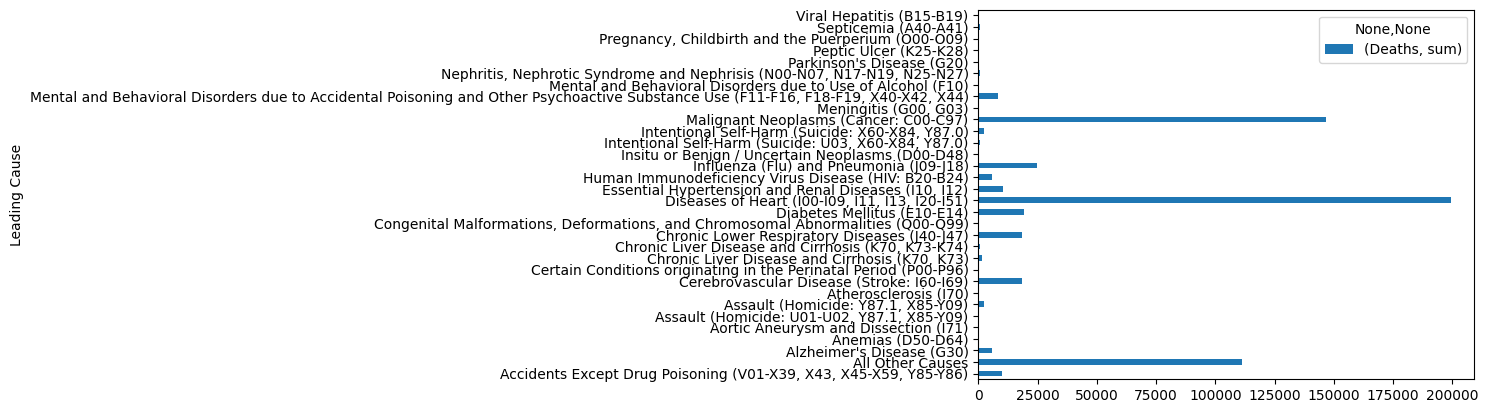

In [85]:
newdf1 = df[['Leading Cause', 'Deaths']]
graph1 = newdf1.groupby('Leading Cause').agg({'sum'})
graph1.plot.barh(y=['Deaths'])

Next, we see an analysis which breaks down the percentage of total deaths due to heart disease, by the `Race Ethnicity` field. As we can see, and as we saw from the results of the fifth analysis from the section above this one, White Non-Hispanic people are the majority of the deaths caused by heart disease.

<AxesSubplot:>

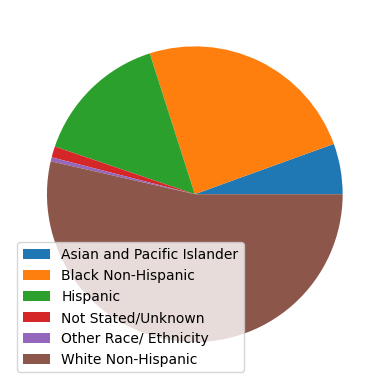

In [110]:
newdf2 = df[ df['Leading Cause'] == 'Diseases of Heart (I00-I09, I11, I13, I20-I51)']

newdf3 = newdf2[['Race Ethnicity', 'Deaths']]
graph = newdf3.groupby('Race Ethnicity').agg({'sum'})
graph.plot.pie(y='Deaths', ylabel='', labels=None, legend=True)

Now, we are looking at the percentage of `Male` to `Female`, in relation to the total number of deaths caused by HIV (from this data set). As can be seen below, the majority of deaths are those of `Male`s. From outside research, we can make the tentative statement that this is due to the stigma surrounding HIV, specifically the inaccurate belief that HIV is a disease that only gay men will test positive for. We can make the assumption that the relationship between them is as follows: many men who might be carriers are afraid of getting tested, and of subsequently being forced to anwer uncomfortable questions about their sexuality when they are forced to divulge that they have been tested for HIV; furthermore, sex ed is lacking in many areas that also happen to be quite conservative and therefore prejudiced against men perceived to be gay; thus, even when some men might suspect that they have HIV, they refuse to get tested and this eventually leads to the disease progressing much further along before they are able to detect it or treat it in a way that might have helped them otherwise.

<AxesSubplot:>

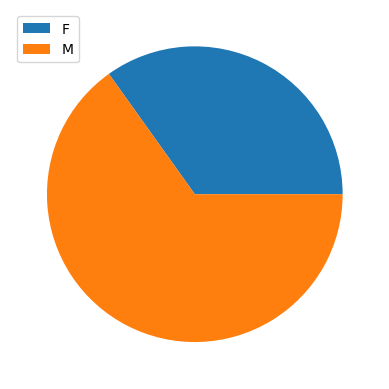

In [111]:
newdf4 = df[ df['Leading Cause'] == 'Human Immunodeficiency Virus Disease (HIV: B20-B24)']

newdf5 = newdf4[['Sex', 'Deaths']]
graph = newdf5.groupby('Sex').agg({'sum'})
graph.plot.pie(y='Deaths', ylabel='', labels=None, legend=True)

Now, we are looking at the progression of the number of deaths resulting from heart disease in NYC through the years. We can see from the line graph below that in 2007, the numbers were very high, and that as the years progressed it reached a low in 2014. However, after that point it began to increase once more. This graph raises a lot of questions, all of which would provide interesting answers. What was the cause for the gradual lowering of total deaths until 2014? Was it due to education, a nationwide sentiment, or the development of technology and science so that we are able to treat heart disease patients better? After 2014, what caused a new growth in the numbers?

<AxesSubplot:xlabel='Year', ylabel='Number of Deaths'>

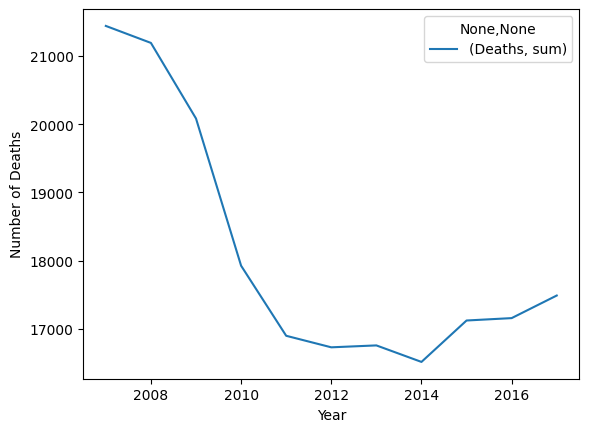

In [114]:
newdf6 = df[ df['Leading Cause'] == 'Diseases of Heart (I00-I09, I11, I13, I20-I51)']

newdf7 = newdf6[['Year', 'Deaths']]
graph = newdf7.groupby('Year').agg({'sum'})
graph.plot.line(ylabel='Number of Deaths')

Lastly, we have a graph which plots the total number of deaths caused by HIV over the years. As can be seen, the numbers are close to 1000 in 2007, but decrease steadily until it is approximately less than 50 in 2017. What caused these changes? Personally for me, this opens up avenues where I'd like to look at the numbers of even older data sets, and get an even more comprehensive graph which spans a longer period of time. Is it that our medicine has gotten better? Is it that we are aware now of HIV as a threat and have been actively teaching kids how to practice safe sex? These graphs are not an end but a beginning to a dozen questions with answers more fascinating than the graph itself.

<AxesSubplot:xlabel='Year', ylabel='Number of Deaths'>

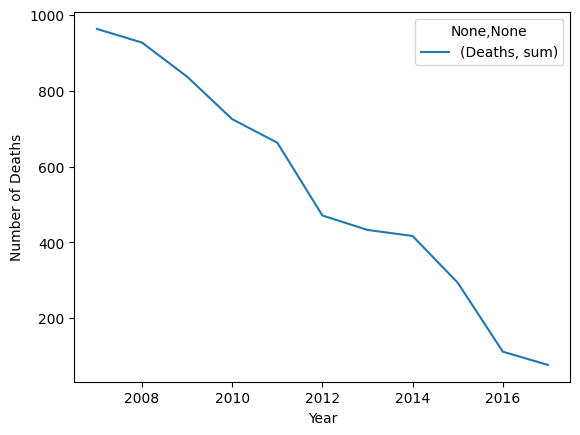

In [118]:
newdf8 = df[ df['Leading Cause'] == 'Human Immunodeficiency Virus Disease (HIV: B20-B24)']

newdf9 = newdf8[['Year', 'Deaths']]
graph = newdf9.groupby('Year').agg({'sum'})
graph.plot.line(ylabel='Number of Deaths')